## Universidade do Estado do Amazonas
### Disciplina: Redes Neurais Artificiais 2025/1
### Integrantes: 
> Emanuelle Marreira - 2215080035

> Afonso Garcia - 1615080003

> Italo Ferreira - 2215080012

> João Carvalho - 2215080040 

## Identificador

In [1]:
identificador = (5+3+2+0)%4
print(identificador)

2


## Bibliotecas

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.set_printoptions(precision=4, suppress=True)

## Definição do Neurônio Perceptron

In [3]:
class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado = 0.1, n_features = 2, vies = -1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.pesos_iniciais = np.random.uniform(-0.5, 0.5, size = self.n_features + 1)
        #self.pesos_iniciais = [-0.5441, 0.5562, -0.4074]
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, X_com_vies):
        entrada = np.dot(X_com_vies, self.pesos)
        print(f"{X_com_vies} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)
    
    def realizar_ajuste(self, erro, xi):
        self.pesos = self.pesos + self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino, y_treino):
        print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis = 1)

        convergiu = False
        while not convergiu:
            self.epocas += 1
            print(f"\n**********{self.epocas}a época**********\n")
            erros_na_epoca = 0
            ocorreu_erro = False

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    print(f"!!!ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    erros_na_epoca += 1
                    ocorreu_erro = True
            
            if not ocorreu_erro:
                convergiu = True
        print(f"\nConvergência alcançada!")
        print(f"Pesos finais: {self.pesos}")
        return self


In [4]:
# Teste com o exemplo da professora
X = [(2,2),(4,4)]
Y = [1,0]
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron.treino(X, Y)
print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [-0.3016  0.3403  0.2737]

**********1a época**********

[-1  2  2] * [-0.3016  0.3403  0.2737] = 1.5296
[-1  4  4] * [-0.3016  0.3403  0.2737] = 2.7575
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********2a época**********

[-1  2  2] * [-0.2016 -0.0597 -0.1263] = -0.1704
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [-0.3016  0.1403  0.0737] = 1.1575
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********3a época**********

[-1  2  2] * [-0.2016 -0.2597 -0.3263] = -0.9704
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [-0.3016 -0.0597 -0.1263] = -0.4425

**********4a época**********

[-1  2  2] * [-0.3016 -0.0597 -0.1263] = -0.0704
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [-0.4016  0.1403  0.0737] = 1.2575
!!!ERRO em: [-1  4  4] | 0 - 1 = -1

**********5a época**********

[-1  2  2] * [-0.3016 -0.2597 -0.3263] = -0.8704
!!!ERRO em: [-1  2  2] | 1 - 0 = 1
[-1  4  4] * [-0.4016 -0.0597 -0.1263] = -0.3425

**********6a época**********

[-1  2  2] * [-0.4016 -0.

## Parte 1 - Resolvendo um problema linearmente separável

### Definição dos dados

In [5]:
dados = np.fromfile('dataAll.txt', dtype = np.float64)
dados = dados.reshape(-1,1,3)
print(f"Dados carregados: {dados.shape}")
dados = dados.reshape(-1, 3)
print(f"Dados carregados: {dados.shape}")
X = dados[:, [0,1]]  # x1 e x2
yd = dados[:, 2]   # yd
print(f"X = {X[:5]}...")
print(f"yd = {yd[:5]}...")

Dados carregados: (1000, 1, 3)
Dados carregados: (1000, 3)
X = [[-363.7884  244.1423]
 [ 328.7572 -256.7658]
 [-164.9827  613.2164]
 [ 536.5905  764.9575]
 [ 314.2297  343.8375]]...
yd = [0. 1. 0. 0. 0.]...


### Treinamento 

In [6]:
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron = neuronio_perceptron.treino(X, yd)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [0.0763 0.1057 0.4844]

**********1a época**********

[  -1.     -363.7884  244.1423] * [0.0763 0.1057 0.4844] = 79.7393
!!!ERRO em: [  -1.     -363.7884  244.1423] | 0.0 - 1 = -1.0
[  -1.      328.7572 -256.7658] * [  0.1763  36.4845 -23.9298] = 18138.7349
[  -1.     -164.9827  613.2164] * [  0.1763  36.4845 -23.9298] = -20693.6417
[ -1.     536.5905 764.9575] * [  0.1763  36.4845 -23.9298] = 1271.8021
!!!ERRO em: [ -1.     536.5905 764.9575] | 0.0 - 1 = -1.0
[ -1.     314.2297 343.8375] * [   0.2763  -17.1745 -100.4256] = -39927.0868
[  -1.      -87.6395 -306.9783] * [   0.2763  -17.1745 -100.4256] = 32333.3539
[  -1.     -172.0622 -500.5087] * [   0.2763  -17.1745 -100.4256] = 53218.6693
[ -1.     727.9602 358.2956] * [   0.2763  -17.1745 -100.4256] = -48484.6664
!!!ERRO em: [ -1.     727.9602 358.2956] | 1.0 - 0 = 1.0
[ -1.     752.3574 268.3682] * [  0.1763  55.6215 -64.596 ] = 24511.5713
[  -1.      685.6276 -833.4677] * [  0.1763  55.6215 -64.596 ] =

### Impressão dos resultados

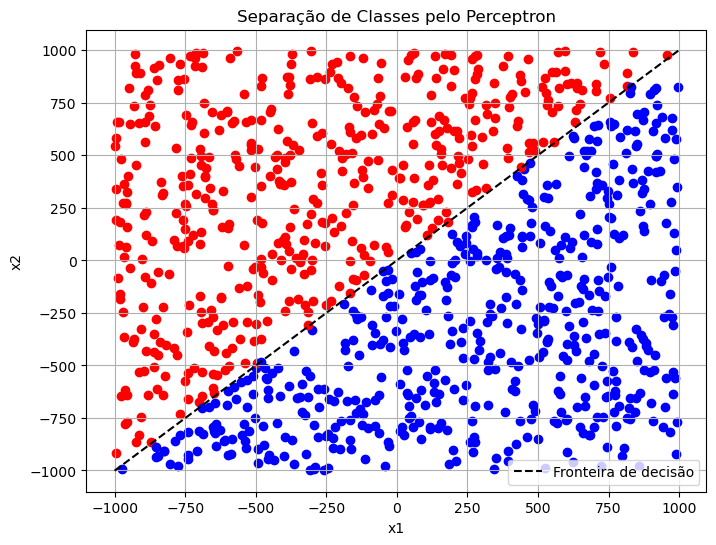

In [7]:
plt.figure(figsize=(8, 6))

for i in range(len(X)):
    cor = 'red' if yd[i] == 0 else 'blue'
    plt.scatter(X[i][0], X[i][1], c=cor)
    
w = neuronio_perceptron.pesos
x_1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

if w[2] != 0:
    x_2 = (w[0]/w[2]) - ((w[1]/w[2]) * x_1)
    plt.plot(x_1, x_2, 'k--', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Separação de Classes pelo Perceptron')
plt.grid(True)
plt.legend()
plt.show()

## Parte 2

### Redefinição do Neurônio Perceptron

In [8]:
class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado, n_features=2, intervalo=(-0.5, 0.5), vies=-1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.intervalo = intervalo
        self.pesos_iniciais = np.random.uniform(intervalo[0], intervalo[1], size=self.n_features + 1)
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, xi):
        entrada = np.dot(xi, self.pesos)
        #print(f"{xi} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)

    def realizar_ajuste(self, erro, xi):
        self.pesos += self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino, y_treino):
        #print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis=1)

        convergiu = False
        while not convergiu:
            self.epocas += 1
            #print(f"\n********** {self.epocas}ª época **********\n")
            ocorreu_erro = False

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    #print(f"!!! ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    ocorreu_erro = True

            if not ocorreu_erro:
                convergiu = True

        #print(f"\nConvergência alcançada!")
        #print(f"Pesos finais: {self.pesos}")
        return self

### Definição dos dados - data2.txt

In [9]:
dados = np.fromfile('data2.txt', dtype=np.float64)

# Remove o excedente para que o reshape funcione corretamente
n_valores_validos = (dados.size // 3) * 3
dados = dados[:n_valores_validos]  # corta o lixo do final, se tiver

dados = dados.reshape(-1, 3)
X = dados[:, :2]
yd = dados[:, 2]

taxas = [0.4, 0.1, 0.01]
intervalos = [(-100, 100), (-0.5, 0.5)]

### Treinamento com a nova configuração 

In [10]:
resultados = []

> η = 0.4, I = (-100, +100)

In [11]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.4, intervalo=(-100, 100))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
resultados.append(("η=0.4", "(-100, 100)", f"{np.mean(ajustes):.2f} ± {np.std(ajustes):.2f}", min(epocas)))

> η = 0.4, I = (-0.5, +0.5)

In [12]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.4, intervalo=(-0.5, 0.5))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
resultados.append(("η=0.4","(-0.5, 0.5)", f"{np.mean(ajustes):.2f}, {np.std(ajustes):.2f}", min(epocas)))

> η = 0.1, I = (-100, +100)

In [13]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.1, intervalo=(-100, 100))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
resultados.append(("η=0.1","(-100, 100)", f"{np.mean(ajustes):.2f}, {np.std(ajustes):.2f}", min(epocas)))

> η = 0.1, I = (-0.5, +0.5)

In [14]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.1, intervalo=(-0.5, 0.5))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
resultados.append(("η=0.1", "(-0.5, 0.5)", f"{np.mean(ajustes):.2f} ± {np.std(ajustes):.2f}", min(epocas)))

> η = 0.01, I = (-100, +100)

In [15]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.01, intervalo=(-100, 100))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
resultados.append(("η=0.01", "(-100, 100)", f"{np.mean(ajustes):.2f} ± {np.std(ajustes):.2f}", min(epocas)))

> η = 0.01, I = (-0.5, +0.5)

In [16]:
ajustes = []
epocas = []
for repeticao in range(10):
    perceptron = NeuronioPerceptron(taxa_de_aprendizado=0.01, intervalo=(-0.5, 0.5))
    perceptron.treino(X, yd)
    ajustes.append(perceptron.total_ajustes_pesos)
    epocas.append(perceptron.epocas)
resultados.append(("η=0.01","(-0.5, 0.5)", f"{np.mean(ajustes):.2f}, {np.std(ajustes):.2f}", min(epocas)))

### Tabela com resultados

In [17]:
tabela = PrettyTable()
tabela.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Qtd de Ajustes (média ± desvio)", "Menor nº de épocas"]

for linha in resultados:
    tabela.add_row(linha)

print(tabela)

+---------------------+--------------------+---------------------------------+--------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Qtd de Ajustes (média ± desvio) | Menor nº de épocas |
+---------------------+--------------------+---------------------------------+--------------------+
|        η=0.4        |    (-100, 100)     |         220.90 ± 179.12         |         4          |
|        η=0.4        |    (-0.5, 0.5)     |           12.90, 7.06           |         3          |
|        η=0.1        |    (-100, 100)     |          865.20, 301.47         |         8          |
|        η=0.1        |    (-0.5, 0.5)     |           19.70 ± 6.33          |         5          |
|        η=0.01       |    (-100, 100)     |        13752.00 ± 4065.92       |         64         |
|        η=0.01       |    (-0.5, 0.5)     |           92.90, 52.01          |         3          |
+---------------------+--------------------+---------------------------------+--------------------+


### Análise dos Dados

escrever aqui

## Parte 3 - Validação Holdout em Problema Não-Linearmente Separável

### Carregando os Dados

In [18]:
dadosh = np.fromfile('dataHoldout.txt', dtype = np.float64)
dadosh = dadosh.reshape(-1,1,3)
print(f"Dados carregados: {dados.shape}")
dadosh = dadosh.reshape(-1, 3)

Dados carregados: (600, 3)


### Mostrando Gráfico Inicial

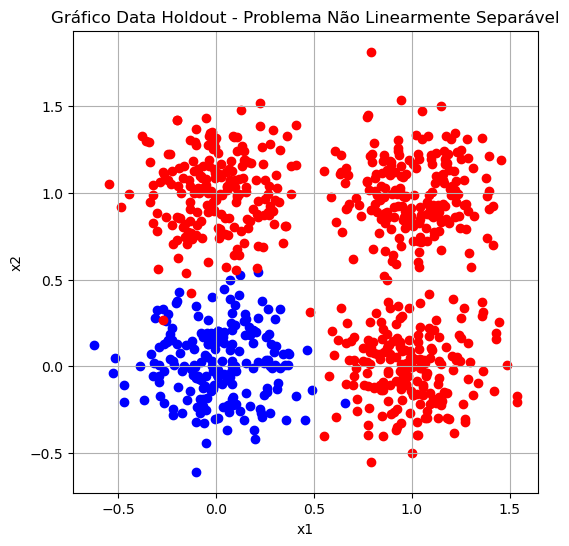

In [19]:
plt.figure(figsize=(6, 6))
for ponto in dadosh:
    cor = 'red' if ponto[2] == 0 else 'blue'
    plt.scatter(ponto[0], ponto[1], c=cor)

plt.title('Gráfico Data Holdout - Problema Não Linearmente Separável')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

## Dados para divisão Holdout

In [20]:
random.seed(identificador)
random.shuffle(dados)
porcentagem = 70/100
ponto_divisao = int(len(dados) * porcentagem )
treino = dados[:ponto_divisao]
teste = dados[ponto_divisao:]
X_treino = np.array([dado[:2] for dado in treino])  
y_treino = np.array([dado[2] for dado in treino])
X_teste = np.array([dado[:2] for dado in teste])  
y_teste = np.array([dado[2] for dado in teste])

##  Neurônio Perceptron

In [21]:
class NeuronioPerceptron:
    def __init__(self, taxa_de_aprendizado = 0.1, n_features = 2, vies = -1):
        self.taxa_de_aprendizado = taxa_de_aprendizado
        self.n_features = n_features
        self.pesos_iniciais = np.random.uniform(-0.5, 0.5, size = self.n_features + 1)
        self.pesos = self.pesos_iniciais.copy()
        self.epocas = 0
        self.total_ajustes_pesos = 0
        self.vies = vies

    def ativacao(self, theta):
        return np.where(theta >= 0, 1, 0)

    def prever(self, X_com_vies):
        entrada = np.dot(X_com_vies, self.pesos)
        print(f"{X_com_vies} * {self.pesos} = {np.round(entrada, 4)}")
        return self.ativacao(entrada)
    
    def realizar_ajuste(self, erro, xi):
        self.pesos = self.pesos + self.taxa_de_aprendizado * erro * xi
        self.total_ajustes_pesos += 1

    def treino(self, X_treino_vies, y_treino):
        print(f"Pesos iniciais (w0, w1, w2): {self.pesos_iniciais}")
        X_treino_vies = np.insert(X_treino, 0, self.vies, axis = 1)

        while self.epocas <= 99:
            print(f"\n**********{self.epocas}a época**********\n")
            erros_na_epoca = 0
            
            indices = list(range(len(X_treino_vies)))
            random.shuffle(indices)
            X_treino_vies = X_treino_vies[indices]
            y_treino = y_treino[indices]

            for xi, yd in zip(X_treino_vies, y_treino):
                y_previsto = self.prever(xi)
                erro = yd - y_previsto

                if erro != 0:
                    print(f"!!!ERRO em: {xi} | {yd} - {y_previsto} = {erro}")
                    self.realizar_ajuste(erro, xi)
                    erros_na_epoca += 1
            self.epocas += 1
        print(f"\nConvergência alcançada!")
        print(f"Pesos finais: {self.pesos}")
        return self


## Treinamento do Neurônio

In [22]:
neuronio_perceptron = NeuronioPerceptron(taxa_de_aprendizado = 0.1, n_features = 2)
neuronio_perceptron = neuronio_perceptron.treino(X_treino, y_treino)

print(f"Número total de ajustes nos pesos: {neuronio_perceptron.total_ajustes_pesos}")
print(f"Número de épocas até a convergência: {neuronio_perceptron.epocas}")

Pesos iniciais (w0, w1, w2): [-0.0202 -0.2926 -0.4379]

**********0a época**********

[-1.     -0.0942  0.0734] * [-0.0202 -0.2926 -0.4379] = 0.0156
[-1.     -0.2392  0.052 ] * [-0.0202 -0.2926 -0.4379] = 0.0674
[-1.      0.0357  0.9596] * [-0.0202 -0.2926 -0.4379] = -0.4105
[-1.      0.0365  0.9037] * [-0.0202 -0.2926 -0.4379] = -0.3863
[-1.     -0.011   0.9534] * [-0.0202 -0.2926 -0.4379] = -0.3941
[-1.      0.0158  0.1153] * [-0.0202 -0.2926 -0.4379] = -0.035
!!!ERRO em: [-1.      0.0158  0.1153] | 1.0 - 0 = 1.0
[-1.     -0.0646 -0.2745] * [-0.1202 -0.2911 -0.4264] = 0.256
[-1.     -0.0646 -0.0445] * [-0.1202 -0.2911 -0.4264] = 0.1579
[-1.     -0.1029  1.0101] * [-0.1202 -0.2911 -0.4264] = -0.2805
[-1.      0.0073 -0.0588] * [-0.1202 -0.2911 -0.4264] = 0.1431
[-1.     -0.011   0.9534] * [-0.1202 -0.2911 -0.4264] = -0.2831
[-1.      0.0223  0.0587] * [-0.1202 -0.2911 -0.4264] = 0.0886
[-1.     -0.0932  0.0057] * [-0.1202 -0.2911 -0.4264] = 0.1448
[-1.     -0.0975  0.0903] * [-0.1202 

## Testes após treinamento

In [23]:
X_teste = np.insert(X_teste, 0, neuronio_perceptron.vies, axis = 1)
previsoes = neuronio_perceptron.prever(X_teste)

[[-1.     -0.0356  1.0122]
 [-1.     -0.18   -0.0099]
 [-1.     -0.1366  0.8013]
 [-1.     -0.1217  0.91  ]
 [-1.     -0.0049  0.8813]
 [-1.      0.1434  1.1588]
 [-1.      0.8952 -0.0038]
 [-1.      0.0974  1.0407]
 [-1.      0.0435  0.9971]
 [-1.     -0.0349  0.077 ]
 [-1.      0.979  -0.0518]
 [-1.     -0.1127  0.9905]
 [-1.      0.0933  0.0812]
 [-1.     -0.0582 -0.0699]
 [-1.      0.9741 -0.0878]
 [-1.      0.0133  0.8788]
 [-1.      0.999  -0.1133]
 [-1.      0.9224  0.1212]
 [-1.      0.04   -0.0648]
 [-1.     -0.0295  0.101 ]
 [-1.     -0.0302  1.0388]
 [-1.      0.0435  0.0388]
 [-1.      1.0941  0.1197]
 [-1.      1.1436  0.1008]
 [-1.      0.8984  0.0146]
 [-1.     -0.0665  1.3019]
 [-1.      1.1416  0.0665]
 [-1.      0.1853  0.0341]
 [-1.      0.0514 -0.1053]
 [-1.      1.1277  0.0809]
 [-1.      0.9526 -0.0811]
 [-1.      0.995  -0.017 ]
 [-1.      0.0642  1.0882]
 [-1.     -0.1127  0.9905]
 [-1.     -0.0255  1.1646]
 [-1.     -0.0939 -0.0232]
 [-1.      0.0516  0.9156]
 

## 1) Matriz de confusão

In [24]:
def matriz_de_confusao(previsoes, y_teste):
    VP = 0 
    VN = 0 
    FP = 0 
    FN = 0 
    for prev, real in zip(previsoes, y_teste):
        if prev == 1 and real == 1:
            VP += 1
        elif prev == 0 and real == 0:
            VN += 1
        elif prev == 1 and real == 0:
            FP += 1
        elif prev == 0 and real == 1:
            FN += 1
    return VP, VN, FP, FN


VP, VN, FP, FN = matriz_de_confusao(previsoes, y_teste)

def acuracia(VP, VN, FP, FN):
    return (VN + VP)/(VP + VN + FP + FN)

def precisao(VP, FP):
    return VP/(VP + FP)

def revocacao(VP, FN):
    return VP/(VP + FN)

acuracia = acuracia(VP, VN, FP, FN)
precisao = precisao(VP, FP)
revocacao = revocacao(VP, FN)

def f1(prec, revoc):
    return (2*prec*revoc)/(prec + revoc)

f1_s = f1(precisao, revocacao)
print("------------Feito na mão------------")
print(f"acurácia: {acuracia}")
print(f"precisão: {precisao}")
print(f"revocação: {revocacao}")
print(f"f1-score: {f1_s}\n")
print("------------Biblioteca sklearn------------")
print("acurácia:", accuracy_score(y_teste, previsoes))
print("precisão:", precision_score(y_teste, previsoes))
print("revocação:", recall_score(y_teste, previsoes))
print("F1-score:", f1_score(y_teste, previsoes))

------------Feito na mão------------
acurácia: 1.0
precisão: 1.0
revocação: 1.0
f1-score: 1.0

------------Biblioteca sklearn------------
acurácia: 1.0
precisão: 1.0
revocação: 1.0
F1-score: 1.0


In [25]:
print(matriz_de_confusao(previsoes, y_teste))

(51, 129, 0, 0)


### Analise dos Resultados

escrever aqui

### Gráficos com os dados de treinamento e teste

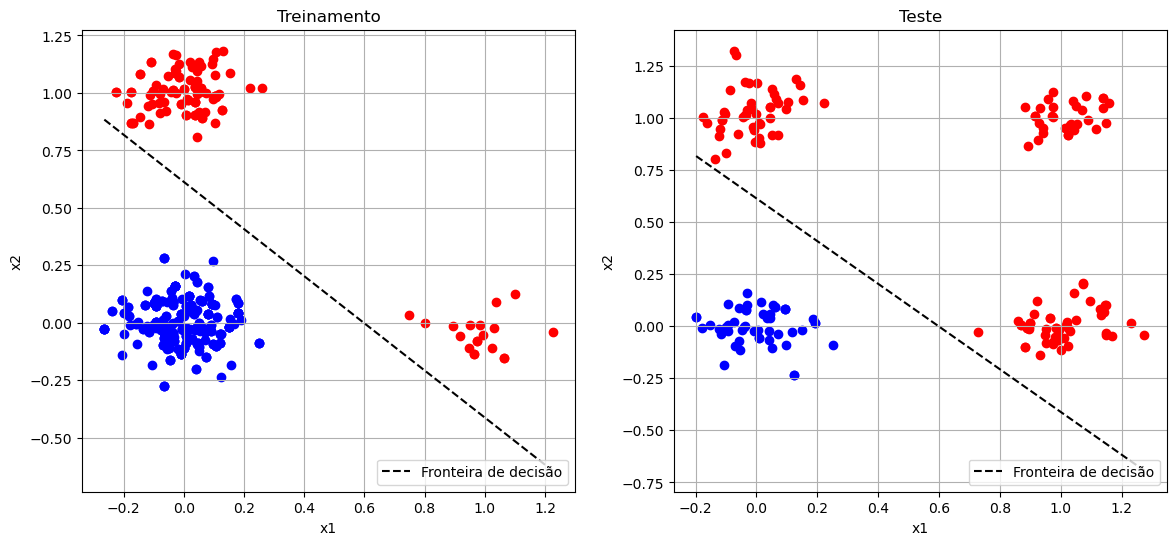

In [27]:
w = neuronio_perceptron.pesos

def plotar_dados(ax, X, y, titulo):
    for i in range(len(X)):
        cor = 'red' if y[i] == 0 else 'blue'
        ax.scatter(X[i][1], X[i][2], c=cor)
    x_1 = np.linspace(min(X[:,1]), max(X[:,1]), 100)
    if w[2] != 0:
        x_2 = (w[0]/w[2]) - ((w[1]/w[2]) * x_1)
        ax.plot(x_1, x_2, 'k--', label='Fronteira de decisão')
    ax.set_title(titulo)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.grid(True)
    ax.legend(loc='lower right')

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

plotar_dados(axs[0], np.insert(X_treino, 0, neuronio_perceptron.vies, axis=1), y_treino, "Treinamento")
plotar_dados(axs[1], X_teste, y_teste, "Teste")

plt.show()